# Symbolische Mathematik mit SymPy
Das Modul *sympy* ermöglicht es, symbolische Mathematik anzuwenden.

*SymPy* ist unglaublich mächtig! Es ist sozusagen die kostenlose Version der kommerziellen Tool *Mathematica* oder *Maple*. Einige Funktionen heissen sogar exakt gleich (wie zum Beispiel *evalf*).

Wir wollen uns hier einige Beispiele ansehen, um die Mächtigkeit von *sympy* zu demonstrieren. Wer tiefer einsteigen möchte, dem bieten sich natürlich viele Tutorials im Internet bzw. die Dokumentation auf der Webseite von *sympy* an (https://www.sympy.org/). Wer ernsthaft mit *SymPy* arbeiten möchte, dem empfehle ich das Buch *Symbolic Computation with Python and SymPy* von Davide Sandona (ISBN: 979-8489815208).

Link zur offiziellen Dokumentation: https://docs.sympy.org/1.10.1/

## Installation
Falls Anaconda verwendet wird, sollte *SymPy* bereits installiert sein. Ansonsten kann SymPy wie folgt installiert werden:


- Unter Anaconda: *conda install -c anaconda sympy*
- Mit PIP: pip install sympy

Was genau ist nun *SymPy*? Dazu zuerst eine Gegenüberstellung mit dem *math*-Modul, dem Standardmodul von Python für mathematische Operationen. Im folgenden Code importieren wir sowohl *sympy* als auch *math* und berechnen jeweils die Wurzel aus der Zahl 9. Da wir keine konkreten Funktionen aus den Modulen importieren, müssen wir den Modulnamen als Präfix davorschreiben, was uns hier auch bei der Unterscheidung der beiden Modulen hilft.

In [1]:
import sympy
import math

print(math.sqrt(9))
sympy.sqrt(9)

3.0


3

Beide Ausgaben sehen ganz ähnlich aus: Es wird, wie erwartet, eine 3 ausgegeben. Allerdings sehen wir keine Kommazahl bei der Ausgabe von *sympy*. Außerdem ist die 3, die von *SymPy* ausgegeben wird, anders formatiert. Der Grund hierfür liegt darin, dass *SymPy* $\LaTeX$-Code generiert. Um welche Objekte handelt es sich hier? Geben wir mal den Typ des jeweiligen Objekts aus:

In [2]:
print(type(math.sqrt(9)))
print(type(sympy.sqrt(9)))

<class 'float'>
<class 'sympy.core.numbers.Integer'>


Die erste Zahl ist vom Typ *float*, einem Standard-Datentyp von Python. Die zweite zahl ist allerdings ein Objekt einer Klasse aus der *sympy*-Bibliothek!
Sehen wir uns ein zweites Beispiel an: Die Wurzel aus 8:

In [3]:
print(math.sqrt(8))
sympy.sqrt(8)

2.8284271247461903


2*sqrt(2)

*sympy* gibt jetzt nicht das (ungenaue) Fließkomma-Ergebnis aus, sondern das symbolische Ergebnis $2\sqrt2$ in der $\LaTeX$-Schreibweise. Die Anzahl der Nachkommastellen ist beim Datentyp *float* begrenzt (IEEE754). *SymPy* kann hier aber auch eine definierte Anzahl Nachkommastellen korrekt ausgeben (standardmäßig sind es 15 Stellen). Wir verwenden hierfür die Methode *evalf*, um 30 Stellen korrekt auszugeben. Mit 30 Stellen sind hier die Gesamtzahl der Stellen gemeint, also Vor- und Nachkommastellen.

In [4]:
sympy.sqrt(8).evalf(30)

2.82842712474619009760337744842

Diese symbolische Berechnung führt auch dazu, dass wir keine Fehler mehr erhalten, die auf den begrenzten Möglichkeiten der Speicherung von Fließkommazahlen beruhen. Berechnen wir die Wurzel aus 8 und quadrieren dieses Ergebnis, sollte eigentlich wieder 8 herauskommen:

In [5]:
math.sqrt(8)**2

8.000000000000002

Tut es aber nicht! Berechnen wir das Ergebnis mit *SymPy*, kommt exakt wieder die Zahl 8 heraus:

In [6]:
sympy.sqrt(8)**2

8

Wollen wir das symbolische Ergebnis als Kommazahl ausgeben, so können wir wie schon gezeigt *evalf* verwenden, oder alternativ die Funktion N(). Hier zum Beispiel $\sqrt{10}$.

In [7]:
result = sympy.sqrt(10)
result.evalf()

3.16227766016838

In [8]:
sympy.N(result)

3.16227766016838

## Symbole (Variablen) und Funktionen definieren

Für die folgenden Beispiele importieren wir für die "schnelle" Berechnung ausnahmsweise alle *SymPy*-Funktionen mit einem \*. Aber Vorsicht: Es werden ggf. andere Funktionen oder Klassen dadurch überschrieben!

In [9]:
# Alles mit einem * importieren (eigentlich keine gute Idee!)
from sympy import *

Zuerst definieren wir symbolische Variablen. Das geht mit der Methode *symbols*, der wir komma- oder leerzeichengetrennt gleich mehrere Variablennamen übergeben können. Die Methode gibt ein Tupel zurück. Möchte man nur eine symbolische Variable erstellen, kann man auch den Konstruktor der Klasse *Symbol* verwenden.

In [10]:
# Definiere symbolische Variablen
x = Symbol("x")

## auch möglich
x, y = symbols("x y")
type(x)

sympy.core.symbol.Symbol

Wir können auch griechische Buchstaben für die Symbole definieren. Hier verwenden wir übrigens die Methode `pprint` (*Pretty Print*), die auch mehrere Prints in einer Notebook-Zelle in $\LaTeX$-Notation erlaubt.

In [11]:
l, pi, mu = symbols("lambda pi mu")
pprint(l)
pprint(pi)
pprint(mu)

λ
π
μ


### Faktorisieren eines Polynoms mit *factor*
Wir definieren eine Funktion $f$ mit $f(x)=3x^2-2x-5$

In [12]:
f = 3*x**2 - 2*x - 5
f

3*x**2 - 2*x - 5

Können wir dieses Polynom durch Faktoren darstellen, um die Nullstellen zu finden?

In [13]:
f.factor()

(x + 1)*(3*x - 5)

Bei *SymPy* hat man häufig die Wahl, ob man eine Methode auf einem Objekt ausführt, oder direkt eine Funktion der Klasse aufruft. Um das Polynom zu faktorisieren kann man hier entweder die Methode *factor* auf dem Objekt oder die Funktion *factor* aus dem *SymPy*-Modul aufrufen:

In [14]:
# Statt Methode: Funktionsaufruf mit Übergabe des Objekts als Argument
# statt f.factor()
factor(f)

(x + 1)*(3*x - 5)

### Gleichungen erstellen und lösen mit *Eq* und *solveset*
Die Nullstellen wären hier also $-1$ und $\frac{5}{3}$. Wir können die Nullstellen natürlich auch von SymPy berechnen lassen. Dazu erstellen wir ein Objekt der Klasse *Equation*. Der Konstruktor erwartet als erstes Argument die linke, als zweite Argument die rechte Seite der Gleichung.


In [15]:
eq1 = Eq(3*x**2 - 2*x - 5, 0)
eq1

Eq(3*x**2 - 2*x - 5, 0)

Mit *solve* können wir die Gleichung lösen.

In [16]:
solve(eq1)

[-1, 5/3]

Die Funktion *solveset* löst auch Gleichungen mit unendlich vielen Lösungen, wie z.B. $sin(x)=0$.

In [17]:
solveset(Eq(sin(x),0))

Union(ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers))

### Vereinfachen von Funktionen: mit *expand* (Ausmultiplizieren)
Mit der Funktion *expand* können wir auch ausklammern, z.B. $f(x) = (x-3)(x+5)(x+\pi)$

In [18]:
f2 = (x-3)*(x+5)*(x+pi)
f2

(pi + x)*(x - 3)*(x + 5)

In [19]:
f2.expand()

pi*x**2 + 2*pi*x - 15*pi + x**3 + 2*x**2 - 15*x

### Vereinfachen von Funktionen: mit *simplify*
*simplify* vereinfacht einen Ausdruck. Allerdings liefert es nicht immer einen Ausdruck, den man wirklich als *Vereinfachung* interpretieren würde. Als erstes Beispiel betrachten wir die Funktion $f(x) = sin^2(x) + cos^2(x)$, was bekanntlich 1 ergibt.

In [20]:
expr1 = sin(x)**2 + cos(x)**2
expr1.simplify()

1

Als zweites Beispiel betrachten wir die Funktion

$f(x) = \frac{x^3+x^2-x-1}{x^2+2x+1}$

Diese Funktion kann man per Hand zum Beispiel mit einer Polynomdivision vereinfachen. Einfacher geht es mit *simplify*:

In [21]:
expr2 = (x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)
expr2.simplify()

x - 1

### Lösen von Linearen Gleichungssystemen

Wir können auch ein Gleichungssystem lösen! Hierzu verwenden wir die Methode *linsolve*. Zum Beispiel:

\begin{align}
-3x-2y+2z&=1 \\
-2x+5y-6z&=4 \\
4x+3y-2z&=2
\end{align}


In [22]:
x,y,z = symbols("x y z")
f1 = Eq(-3*x-2*y+2*z,1)
f2 = Eq(-2*x+5*y-6*z,4)
f3 = Eq(4*x+3*y-2*z,2)

linsolve([f1,f2,f3], x,y,z)

{(-1, 4, 3)}

### Differenzieren mit *diff*
Wie lautet die erste Ableitung der Funktion $f(x)=3x^2-2x-5$? Ermitteln wir diese mit der Funktion *diff*. Gibt es nur eine Variable, muss man diese nicht angeben. Ansonsten gibt man als Argument die Variable an, nach der differenziert werden soll.

In [23]:
f = 3*x**2 - 2*x - 5
diff(f)

6*x - 2

Oder:

In [24]:
diff(f,x)

6*x - 2

Wir definieren eine Funktion mit zwei Variablen. Nun kann man partiell differentieren:

$f_2(x)=7x^3+8x-2y^2$

In [25]:
f2 = 7*x**3 - 2*y**2 + 8 *x
f2

7*x**3 + 8*x - 2*y**2

In [26]:
# Partiell ableiten nach x
diff(f2,x)

21*x**2 + 8

In [27]:
# Partiell ableiten nach y
diff(f2,y)

-4*y

Wie lautet die zweite Ableitung von $f(x)=3x^2-2x-5$?

In [28]:
diff(f,x,2)

6

Welchen Wert hat die 1. Ableitung an der Stelle $x=3$?

In [29]:
diff(f).evalf(subs={x:3})

16.0000000000000

### Integrieren mit *integrate*
Mit der Funktion *integrate* können wir das unbestimmte Integral unserer Funktion $f(x)$ ermitteln, also $\int_{}^{}x^3-x^2+5xdx$. Das Ergebnis ist $x^3-x^2+5x\, (+c)$

In [30]:
integrate(f)

x**3 - x**2 - 5*x

*integrate* kann als weiteres Argument ein Tupel entgegennehmen, das als erstes die Variable, nach der Integriert werden soll, sowie die untere und obere Grenze des bestimmten Integrals enthält. Wir wollen beispielsweise das Integral von $f(x)$ für den Bereich 0 bis 5 ausrechnen, also

$\int_{0}^{5}3x^2-2x+5\,dx$

so liefert uns *integrate* das Ergebnis 125:

In [31]:
integrate(f, (x,0,5))

75

### Polynom bestimmen mit *interpolate*
Nehmen wir an, wir kennen unser Polynom $f(x)$ gar nicht, sondern nur empirisch ermittelte Messwerte und wollen ein Polynom erstellen, das sich möglichst exakt durch die gemessenen Punkte bewegt. Hier hilft die Funktion *interpolate*. Als erstes Beispiel geben wir für $y$ die Werte 1, 4 und 9 an. Beginnen die x-Werte bei 1 und werden jeweils inkrementiert, braucht man diese nicht extra anzugeben:

In [32]:
interpolate((1,4,9),x)

x**2

In [33]:
interpolate((6,13,26),x)

3*x**2 - 2*x + 5

### Gleichungen lösen mit *solve*
Wir wollen eine Gleichung lösen: Berechne die Nullstellen der Funktion

$f(x)=x^2-2x-8 = 0$

In [34]:
# Beispiel 1
solve(x**2-2*x-8)

[-2, 4]

In [35]:
solve(5*sin(x))

[0, pi]

### Vergleich von Ausdrücken
Mit etwas mathmatischem Schulwissen, Stichwort Binomische Formeln, weiß man, dass folgende zwei Gleichungen mathematisch gleich sind:

$f_1(x) = (2x+3)^2$ und $f_1(x) =  4x^2+12x+9$

Vergleichen wir dies mit dem == Operator von Python ist das Ergebnis allerdings *False*. SymPy-Objekte bieten jedoch die Methode *equals* an (Java-Programmierer kennen das!). Diese liefert *True*:

In [36]:
from sympy import *
f1 = (2*x+3)**2
f2 = 4*x**2 +12*x + 9
x = Symbol("x")
print(f1==f2) 
print(f1.equals(f2))


False
True


## Arbeiten mit Matrizen
Mit *sympy* kann man auch alle üblichen Rechenoperationen auf Matrizen bzw. Vektoren ausführen. Zuerst erstellen wir auf verschiedene Arten eine Matrix.

In [37]:
from sympy.matrices import Matrix
# Matrix erstellen: Jede Zeile als Liste übergeben
matrix1 = Matrix([[4,-2,1],[2,-5,1],[2,4,-5]])
matrix1

Matrix([
[4, -2,  1],
[2, -5,  1],
[2,  4, -5]])

In [38]:
# Matrix erstellen: Angabe der Anzahl Zeilen und Spalten
matrix2 = Matrix(3,3,[4,5,3,1,6,5,3,1,5])
matrix2

Matrix([
[4, 5, 3],
[1, 6, 5],
[3, 1, 5]])

In [39]:
# Matrizen elementweise addieren
matrix1 + matrix2

Matrix([
[8, 3, 4],
[3, 1, 6],
[5, 5, 0]])

In [40]:
# Matrizen elementweise multiplizieren
matrix1.multiply_elementwise(matrix2)

Matrix([
[16, -10,   3],
[ 2, -30,   5],
[ 6,   4, -25]])

In [41]:
# Matrixmultiplikation
matrix1 * matrix2

Matrix([
[17,   9,   7],
[ 6, -19, -14],
[-3,  29,   1]])

Im vorherigen Beispiel wurde die übliche Matrixmultiplikation durchgeführt. Dabei ist beachten, dass die Spaltenzahl der ersten Matrix mit der Zeilenzahl der zweiten Matrix übereinstimmen muss. Die Ergebnismatrix hat die Dimension: Zeilenzahl der ersten Matrix, Spaltenzahl der zweiten Matrix.

In [42]:
# Weiteres Beispiel mit Symbolen
a1, a2, a3, a4, a5, a6 = symbols("a(1:7)")
b1, b2, b3, b4  = symbols("b(1:5)")

matrix3 = Matrix(3,2,[a1, a2, a3, a4, a5, a6])
matrix4 = Matrix(2,2,[b1, b2, b3, b4])
matrix3 * matrix4

Matrix([
[a1*b1 + a2*b3, a1*b2 + a2*b4],
[a3*b1 + a4*b3, a3*b2 + a4*b4],
[a5*b1 + a6*b3, a5*b2 + a6*b4]])

Einige typische Rechenoperationen: Berechnung der Inversen, der Determinante und eine Matrix transponieren.

In [43]:
# Inverse einer Matrix
m = Matrix(3,3,[1,2,3,1,6,5,3,1,5])
pprint(m)
pprint(m.inv())

⎡1  2  3⎤
⎢       ⎥
⎢1  6  5⎥
⎢       ⎥
⎣3  1  5⎦
⎡-25/6  7/6   4/3 ⎤
⎢                 ⎥
⎢-5/3   2/3   1/3 ⎥
⎢                 ⎥
⎣17/6   -5/6  -2/3⎦


In [44]:
# Auch möglich für die Berechnung einer Inversen:
m**-1

Matrix([
[-25/6,  7/6,  4/3],
[ -5/3,  2/3,  1/3],
[ 17/6, -5/6, -2/3]])

Matrix multipliziert mit ihrer Inversen ergibt die Einheitsmatrix:

In [45]:
m * m.inv()

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

Hier nochmal ein Vergleich mit *NumPy*: Auch damit kann man die Inverse einer Matrix berechnen und Matrizen multiplizieren. Hier sollte auch wieder die Einheitsmatrix das Ergebnis sein. Allerdings ergibt die Berechnung aufgrund der Fehler in der Fließkommaarithmetik keine exakten Einser auf der Diagonalen.

In [46]:
import numpy as np
m_np = np.matrix("1,2,3;1,6,5;3,1,5")
np.linalg.inv(m_np)*m_np

matrix([[ 1.00000000e+00,  1.77635684e-15,  8.88178420e-16],
        [ 0.00000000e+00,  1.00000000e+00, -2.22044605e-16],
        [ 0.00000000e+00, -2.22044605e-16,  1.00000000e+00]])

Weiter mit *SymPy*: Wir wollen eine Matrix transponieren. Dazu gibt es einerseits die Methode *transpose* oder man ergänzt die Matrix durch ein *.T*:

In [47]:
# Transponieren einer Matrix
m.T

Matrix([
[1, 1, 3],
[2, 6, 1],
[3, 5, 5]])

In [48]:
# Auch möglich:
m.transpose()

Matrix([
[1, 1, 3],
[2, 6, 1],
[3, 5, 5]])

Häufig benötigen wir die Determinante einer Matrix. Die Methode *det* liefert diesen Wert:

In [49]:
# Determinante berechnen
m.det()


-6

### Beispiel: Lineare Regression nach Moore-Penrose
Wir wollen eine Lineare Regression mit Hilfe der Moore-Penrose-Pseudo-Inversen durchführen (Lösen eines überbestimmten Gleichungssystems).

Allgemein berechnet sich ein Lineares Gleichungssystem mit:

$A \cdot x = b$

Dies können wir direkt einsetzen, wenn wir ein linear unabhängiges Gleichungssystem mit n Gleichungen bei n Variablen haben. Bei der Lineare Regression haben wir allerdings (wesentlich) mehr Gleichungen als Variablen. Mit Hilfe der `Moore-Penrose-Pseudo-Inverse` können wir eine Näherung der Variablen ermitteln (analog der Methode der kleinsten Quadrate).

Die `Moore-Penrose-Pseudo-Inverse` berechnet sich wie folgt:

$A^+=(A^T \cdot A)^{-1}$

Diese Pseude-Inverse setzen wir in die Gleichung ein:

$A^+ \cdot x = b$

Wir berechnen anhand eines Beispiels die Koeffizienten einer Regressionsgeraden $\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2$ mit den gegebenen Werten. In die erste Spalte fügen wir 1er ein, um auch einen Wert für $\beta_0$ (Konstante, y-Achsenabschnitt) zu berechnen.

In [50]:
data = Matrix([[1,2,19],[1,9,23],[1,18,57],[1,22,79],[1,35,91],[1,40,100]])
y = Matrix([21,30,80,101,119,132])
coef = N((data.T * data).inv() * data.T * y)
coef

Matrix([
[-0.398773664809668],
[ 0.252108509191549],
[  1.22934138165508]])

Wir können nun eine Schätzung für $\hat{y}$ ermitteln, z.B. für $x_1=4$ und $x_2=15$

In [51]:
coef[0] + coef[1] * 4 + coef[2] * 15

19.0497810967827

## Plots erstellen
Mit *SymPy* können auch auf die Schnelle Plots erstellt werden. Die Möglichkeiten sind nicht so vielfältig wie mit Matplotlib oder Seaborn, aber für einfache Diagramme sind die gebotenen Möglichkeiten völlig ausreichend. Wir wollen zuerst einen simplen Plot für die Funktion $f(x)=x^2$ erstellen.

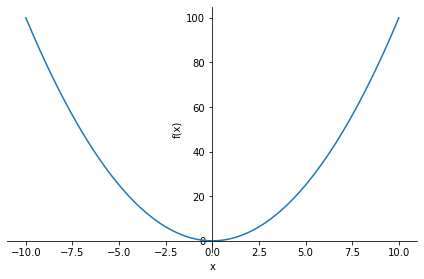

In [52]:
x = Symbol("x")
f = x**2
plot(f)

Standardmäßig wird ein Bereich für x von -10 bis 10 verwendet. Natürlich können wir dies konfigurieren:

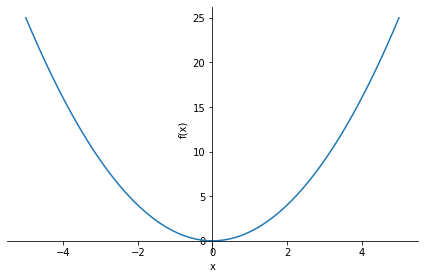

In [53]:
plot(f, (x,-5,5))

Und wir können auch die Farbe bestimmen. Auch ein Titel ist möglich.

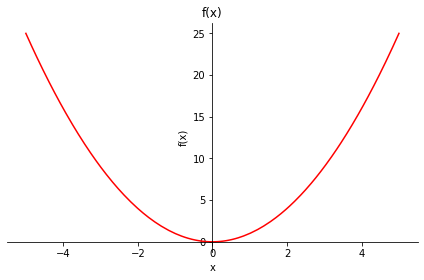

In [54]:
plot(f, (x,-5,5), line_color="r", title="f(x)")

Wir können auch mehrere Funktionen auf einmal plotten.

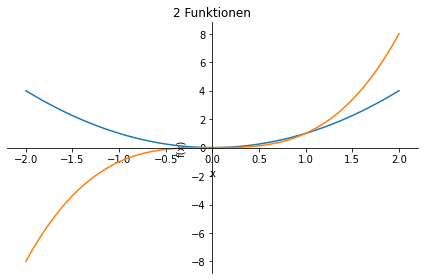

In [55]:
f2 = x**3
plot(f, f2, (x,-2,2), title="2 Funktionen")

Allerdings haben wir jetzt nicht mehr die Möglichkeit, die Farben selbst zu bestimmen. Im folgenden Beispiel plotten wir 3 Funktionen in einem Diagramm, erstellen eine Legende und definieren die Farben für jede Funktion.Für die Legende verwenden wir einen Raw-String (ein `r` vor den Anführungsstrichen), sodass wir im String $\LaTeX$ verwenden können.

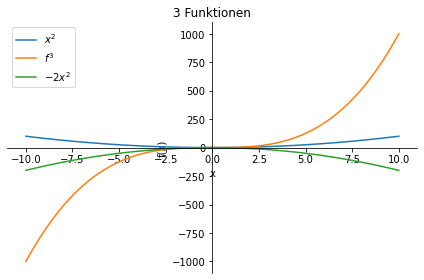

In [56]:
f3 = -2*x**2
p = plot(f, (x,-10,10), title="3 Funktionen", color="k", label = r"$x^2$", legend=True, show=False)
p.extend(plot(f2, label=r"$f^3$", color="g", show=False))
p.extend(plot(f3, label=r"$-2x^2$", color="r", show=False))
p.show()

Wir können auch 3-dimensionale Plots erstellen. Dazu importieren wir `plot3d` aus dem Modul `sympy.plotting`. Um die Größe des Plots anzupassen brauchen wir noch `Matplotlib`.


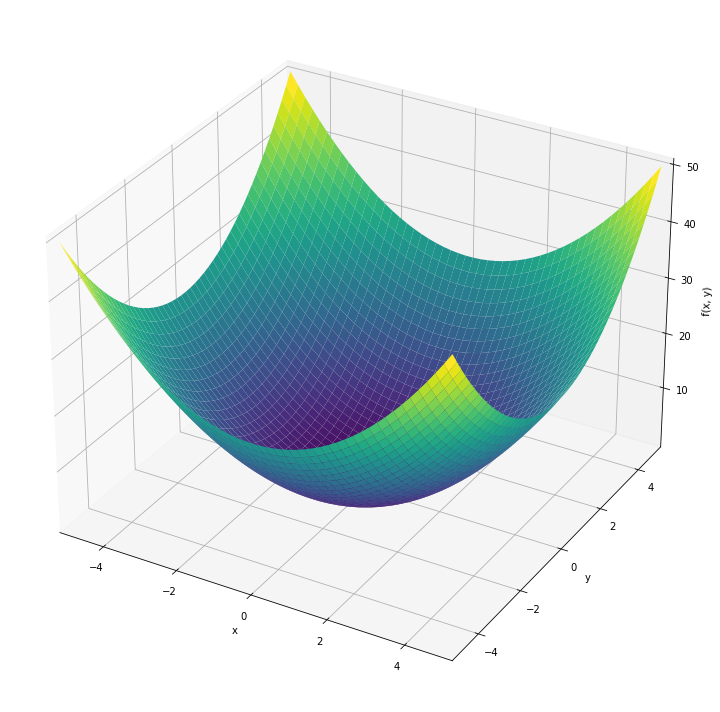

In [57]:
%matplotlib inline
from sympy.plotting import plot3d
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=10,10
x, y = symbols("x y")
plot3d(x**2+ y**2, (x,-5,5), (y,-5,5))

# Beispiel: Berechnen der Länge einer Kurve
Wir wollen die Länge der Kurve für die Funktion $f(x) = \frac{1}{2}(e^x+e^{-x})$ in den Grenzen von $[-2;2]$ berechnen (in der Grafik den rot markierten Bereich der Kurve). Wir plotten zuerst die Kurve mit Hilfe der *plot*-Funktion von *sympy*.

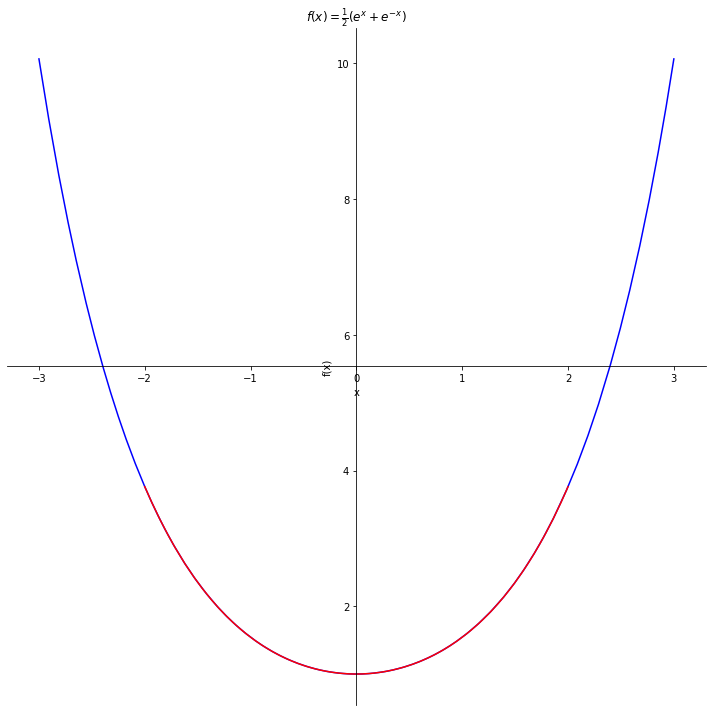

In [58]:
x = Symbol("x")
f = Rational(1,2) * (exp(x)+exp(-x))
p = plot(f, (x,-3,3), line_color="b", title=r"$f(x)=\frac{1}{2}(e^x+e^{-x})$", show=False)
p.extend(plot(f, (x,-2,2), line_color="r",show=False))
p.show()

Die Formel für die Berechnung der Länge eines Kurvenstücks lautet:

$L = \int_{a}^{b}\sqrt{1+(f'(x))^2}$

Mit *sympy* lässt sich die Länge einfach berechnen:

In [59]:
from sympy import *

# Wir beschränken die symbolische Variable x auf reele Zahlen (also keine komplexen Zahlen), dies beschleunigt die Berechnung. 
x = symbols("x", real=True)

# Die Funktion für die Berchnung einer Kurve. Wir verwenden sympy.Rational, um den Bruch 1/2 nicht als Fließkommazahl, sondern als sympy-Objekt zu erstellen.
f = Rational(1,2) * (exp(x)+exp(-x))

# 1. Ableitung bestimmen. Die Methode doit() wertet den Ausdruck direkt aus.
deriv = diff(f,x).doit()

# Bestimme das Integral in den Grenzen von -2 bis 2
length = Integral(sqrt(1+deriv**2), (x,-2,2))
length

Integral(sqrt((exp(x)/2 - exp(-x)/2)**2 + 1), (x, -2, 2))

Schließlich wandeln wir dieses Ergebnis noch in einen numerischen Wert um:

In [60]:
N(length)

7.25372081569404

## Tipp
Abschließend noch ein Tipp, um auf die Schnelle mit *SymPy* arbeiten zu können: Nach dem Import unter dem Alias *sp* (der übliche Alias für *SymPy*) ruft man die Funktion `init_session()` auf. Dadurch werden alle Module importiert, die Symbole x, y, z und t, die Symbole für ganzzahlige Werte (Integers) k, m und n sowie die Funktions-Symbole f, g und h definiert. Außerdem wird noch die Funktion `init_printing()` aufgerufen, die die Ausgabe von Unicode ermöglicht. Dies hilft insbesondere, wenn man *SymPy* auf einer Konsole ausführt.

In [61]:
import sympy as sp
sp.init_session()

IPython console for SymPy 1.10.1 (Python 3.9.12-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.10.1/



In [62]:
f = sqrt(x)
pprint(f)
type(f)

√x


sympy.core.power.Pow